\setcounter{secnumdepth}{0}
**Authors:** *Cailey Bobadilla* and *William Mullin* 

## Project Overview [(GitHub)](https://github.com/willi8m/inflation_visualization)  

This project analyzes the relationship between inflation (via CPI) and Federal Reserve interest rates, focusing on trends, correlations, and the impact of events, with special emphasis on Jerome Powell's tenure.

### Objectives:

1. **Data Analysis**  

    - Examine CPI trends by sector.  
    - Analyze CPI changes during Democratic and Republican administrations.  
    - Explore the impact of COVID-19 on inflation and Federal Reserve rates.  
    - Highlight key geopolitical events influencing inflation and interest rates.  

2. **Correlation Analysis**  

    - Investigate the relationship between CPI and Federal Reserve rates.  

3. **Forecasting**  

    - Predict CPI trends for 2024–2026, considering Jerome Powell's policies.  

4. **Policy Evaluation**  

    - Assess the effectiveness of Jerome Powell's decisions on inflation and interest rates.  

---

## Data Sources  

- **Consumer Price Index (CPI):** Bureau of Labor Statistics  
  [CPI Data](https://www.bls.gov/cpi/data.htm)  
- **Federal Reserve Rates:** Federal Reserve Bank of St. Louis  
  [Federal Reserve Rates](https://fred.stlouisfed.org/series/FEDFUNDS)

\newpage

## Methodology  

1. **Data Cleaning**  

   - Use Python for data preprocessing and cleaning.  

2. **Visualization**  

   - Create detailed visualizations of CPI trends, political influences, and major events.  

3. **Forecasting**  

   - Use historical data to model and forecast future CPI trends.  

---

## Tools and Technologies  

- **Programming Language:** Python  
- **Libraries:**  

  - Matplotlib: Visualization  
  - Pandas: Data manipulation  
  - Seaborn: Statistical visualization  
  - NumPy: Numerical computations  
  - Statsmodels: Time series analysis  
  - Scikit-learn: Machine learning for forecasting  
  

**Note:** The analysis will particularly focus on economic policies and geopolitical factors during Jerome Powell's tenure as Chair of the Federal Reserve.

\newpage


## Data Cleaning

This section focuses on preparing the dataset for analysis by performing the following tasks:

1. Loading data from external sources (CPI and Federal Reserve rates datasets).  
2. Handling missing values, outliers, or inconsistent data.  
3. Formatting the data into a structure suitable for analysis (e.g., merging datasets, converting dates).  
4. Adding derived columns or features for analysis, such as year-over-year CPI changes.  

The cleaned data will serve as the foundation for all subsequent analyses.


In [1]:
# Import the proper libraries required 
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
# Import Chained CPI data from 1999-2024 from the Bureau of Labor Statistics 
chained_cpi = pd.read_csv("Chained CPI updated - BLS Data Series.csv")

print(chained_cpi.head())

   Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct  \
0  1999    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1  2000  100.3  100.9  101.6  101.6  101.7  102.1  102.3  102.3  102.8  102.9   
2  2001  103.3  103.7  103.9  104.2  104.6  104.8  104.5  104.6  104.9  104.7   
3  2002  104.2  104.5  105.1  105.6  105.6  105.6  105.7  106.0  106.3  106.4   
4  2003  106.5  107.3  107.9  107.7  107.5  107.6  107.7  108.2  108.5  108.4   

     Nov    Dec  
0    NaN  100.0  
1  102.8  102.6  
2  104.4  103.9  
3  106.3  106.0  
4  108.0  107.8  


In [3]:
# Import CPI data on urban consumers from 1913-2024 from the Bureau of Labor Statistics 
urban_consumers = pd.read_csv("Updated CPI_All_Urban_Consumers - BLS Data Series.csv")

print(urban_consumers.head())

   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1913   9.8   9.8   9.8   9.8   9.7   9.8   9.9   9.9  10.0  10.0  10.1   
1  1914  10.0   9.9   9.9   9.8   9.9   9.9  10.0  10.2  10.2  10.1  10.2   
2  1915  10.1  10.0   9.9  10.0  10.1  10.1  10.1  10.1  10.1  10.2  10.3   
3  1916  10.4  10.4  10.5  10.6  10.7  10.8  10.8  10.9  11.1  11.3  11.5   
4  1917  11.7  12.0  12.0  12.6  12.8  13.0  12.8  13.0  13.3  13.5  13.5   

    Dec  HALF1  HALF2  
0  10.0    NaN    NaN  
1  10.1    NaN    NaN  
2  10.3    NaN    NaN  
3  11.6    NaN    NaN  
4  13.7    NaN    NaN  


\newpage
### Handling Missing Data

This cell addresses any missing values by:
- Filling missing CPI values using interpolation.
- Dropping incomplete rows where critical data is unavailable.

Rationale: Ensuring no missing values disrupt our analysis pipeline.


In [4]:
# Clean the Chained CPI data ensuring to remove NaN values for 1999

print(chained_cpi.isnull().sum())
print(chained_cpi.isnull())

chained_cpi_cleaned = chained_cpi.copy()
chained_cpi_cleaned = chained_cpi[chained_cpi['Year'] != 1999].copy()
 

Year    0
Jan     1
Feb     1
Mar     1
Apr     1
May     1
Jun     1
Jul     1
Aug     1
Sep     1
Oct     1
Nov     2
Dec     1
dtype: int64
     Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep  \
0   False   True   True   True   True   True   True   True   True   True   
1   False  False  False  False  False  False  False  False  False  False   
2   False  False  False  False  False  False  False  False  False  False   
3   False  False  False  False  False  False  False  False  False  False   
4   False  False  False  False  False  False  False  False  False  False   
5   False  False  False  False  False  False  False  False  False  False   
6   False  False  False  False  False  False  False  False  False  False   
7   False  False  False  False  False  False  False  False  False  False   
8   False  False  False  False  False  False  False  False  False  False   
9   False  False  False  False  False  False  False  False  False  False   
10  False  False  Fal

In [5]:
# Check Chained CPI data to see that the values were successfully dropped 

print(chained_cpi_cleaned.head())


   Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct  \
1  2000  100.3  100.9  101.6  101.6  101.7  102.1  102.3  102.3  102.8  102.9   
2  2001  103.3  103.7  103.9  104.2  104.6  104.8  104.5  104.6  104.9  104.7   
3  2002  104.2  104.5  105.1  105.6  105.6  105.6  105.7  106.0  106.3  106.4   
4  2003  106.5  107.3  107.9  107.7  107.5  107.6  107.7  108.2  108.5  108.4   
5  2004  108.5  109.1  109.7  110.0  110.6  110.8  110.7  110.7  111.0  111.6   

     Nov    Dec  
1  102.8  102.6  
2  104.4  103.9  
3  106.3  106.0  
4  108.0  107.8  
5  111.6  111.2  


In [6]:
# Clean the urban consumers CPI data, removing HALF1 and HALF2 columns

print("Urban Consumers Before:")
print(urban_consumers.head())
urban_consumers_cleaned = urban_consumers.copy()
urban_consumers_cleaned = urban_consumers.drop(columns=['HALF1', 'HALF2'])



Urban Consumers Before:
   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1913   9.8   9.8   9.8   9.8   9.7   9.8   9.9   9.9  10.0  10.0  10.1   
1  1914  10.0   9.9   9.9   9.8   9.9   9.9  10.0  10.2  10.2  10.1  10.2   
2  1915  10.1  10.0   9.9  10.0  10.1  10.1  10.1  10.1  10.1  10.2  10.3   
3  1916  10.4  10.4  10.5  10.6  10.7  10.8  10.8  10.9  11.1  11.3  11.5   
4  1917  11.7  12.0  12.0  12.6  12.8  13.0  12.8  13.0  13.3  13.5  13.5   

    Dec  HALF1  HALF2  
0  10.0    NaN    NaN  
1  10.1    NaN    NaN  
2  10.3    NaN    NaN  
3  11.6    NaN    NaN  
4  13.7    NaN    NaN  


In [7]:
# Check the urban consumers CPI data to ensure the columns were properly removed 

print("Urban Consumers After:")
print(urban_consumers_cleaned.head())


Urban Consumers After:
   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0  1913   9.8   9.8   9.8   9.8   9.7   9.8   9.9   9.9  10.0  10.0  10.1   
1  1914  10.0   9.9   9.9   9.8   9.9   9.9  10.0  10.2  10.2  10.1  10.2   
2  1915  10.1  10.0   9.9  10.0  10.1  10.1  10.1  10.1  10.1  10.2  10.3   
3  1916  10.4  10.4  10.5  10.6  10.7  10.8  10.8  10.9  11.1  11.3  11.5   
4  1917  11.7  12.0  12.0  12.6  12.8  13.0  12.8  13.0  13.3  13.5  13.5   

    Dec  
0  10.0  
1  10.1  
2  10.3  
3  11.6  
4  13.7  


In [8]:
# Data Cleaning on Federal Rates CSV file in order to format the data in a similar manner as to the CPI data

# Convert DATE to datetime for easier manipulation
fed_data = pd.read_csv("FEDFUNDS.csv")
fed_data_cleaned = fed_data.copy()
fed_data_cleaned['DATE'] = pd.to_datetime(fed_data_cleaned['DATE'])

# Extract year and month
fed_data_cleaned['Year'] = fed_data_cleaned['DATE'].dt.year
fed_data_cleaned['Month'] = fed_data_cleaned['DATE'].dt.month

# Pivot the table to have months as columns
fed_data_cleaned = fed_data_cleaned.pivot(index='Year', columns='Month', values='FEDFUNDS')

# Rename the columns to match CPI format
fed_data_cleaned.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Reset index to make Year a column
fed_data_cleaned.reset_index(inplace=True)

# Display the cleaned data
fed_data_cleaned.head()


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1954,NaN,NaN,NaN,NaN,NaN,NaN,0.80,1.22,1.07,0.85,0.83,1.28
1,1955,1.39,1.29,1.35,1.43,1.43,1.64,1.68,1.96,2.18,2.24,2.35,2.48
2,1956,2.45,2.50,2.50,2.62,2.75,2.71,2.75,2.73,2.95,2.96,2.88,2.94
3,1957,2.84,3.00,2.96,3.00,3.00,3.00,2.99,3.24,3.47,3.50,3.28,2.98
4,1958,2.72,1.67,1.20,1.26,0.63,0.93,0.68,1.53,1.76,1.80,2.27,2.42


In [9]:
# Clean the federal rate data to remove NaN values in 1954 

fed_data_cleaned = fed_data_cleaned[fed_data_cleaned['Year'] != 1954].copy()
 

In [10]:
print(fed_data_cleaned.head())

   Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
1  1955  1.39  1.29  1.35  1.43  1.43  1.64  1.68  1.96  2.18  2.24  2.35   
2  1956  2.45  2.50  2.50  2.62  2.75  2.71  2.75  2.73  2.95  2.96  2.88   
3  1957  2.84  3.00  2.96  3.00  3.00  3.00  2.99  3.24  3.47  3.50  3.28   
4  1958  2.72  1.67  1.20  1.26  0.63  0.93  0.68  1.53  1.76  1.80  2.27   
5  1959  2.48  2.43  2.80  2.96  2.90  3.39  3.47  3.50  3.76  3.98  4.00   

    Dec  
1  2.48  
2  2.94  
3  2.98  
4  2.42  
5  3.99  


### Data Cleaning Completed

The dataset is now ready for analysis and visualization. Cleaned data includes:

- CPI trends by sector.
- Federal Reserve rates for the same time periods.
- Geopolitical and administrative metadata (if applicable).


\newpage
## Visualization

This section provides visual insights into the data by plotting:

1. **CPI Trends by Sector**: How CPI values have evolved over time across different industries.  
2. **Comparison by Administration**: Analyzing how inflation trends vary under Democratic vs. Republican presidents.  
3. **COVID-19 Impacts**: Highlighting the inflationary spikes during the pandemic period.  
4. **Geopolitical Events**: Annotating key events that influenced inflation and Federal Reserve rates.  

The visualizations aim to highlight patterns, anomalies, and relationships in the data.


\newpage
### CPI Trends Over Time

This plot shows the historical progression of the Consumer Price Index (CPI) from 1954 to the present.  
Key features:

- The x-axis represents time (years), and the y-axis shows CPI values.  
- Annotations for significant events affecting inflation, such as economic recessions or policy changes.

Purpose: To provide a broad overview of inflation trends over time and highlight periods of significant fluctuation.


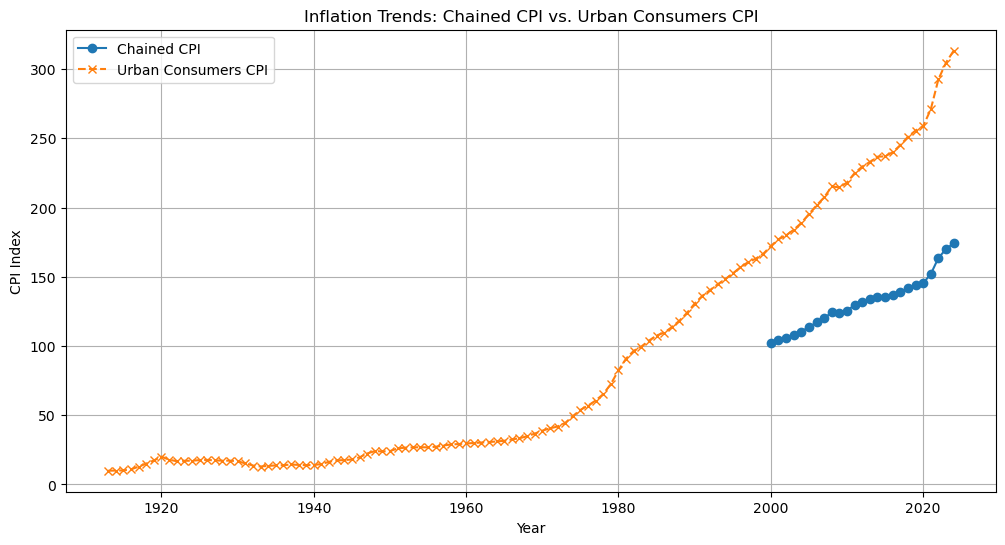

In [11]:
import matplotlib.pyplot as plt  # Ensure this is correctly imported
import seaborn as sns

# CPI Trends Visualization
plt.figure(figsize=(12, 6))
plt.plot(chained_cpi_cleaned['Year'], chained_cpi_cleaned.iloc[:, 1:].mean(axis=1), label='Chained CPI', linestyle='-', marker='o')
plt.plot(urban_consumers_cleaned['Year'], urban_consumers_cleaned.iloc[:, 1:].mean(axis=1), label='Urban Consumers CPI', linestyle='--', marker='x')
plt.xlabel("Year")
plt.ylabel("CPI Index")
plt.title("Inflation Trends: Chained CPI vs. Urban Consumers CPI")
plt.legend()
plt.grid()
plt.show()


\newpage
### CPI vs. Federal Reserve Rates

This scatterplot examines the correlation between the Federal Reserve's interest rates and CPI. 
 
Hypothesis: Higher interest rates typically lead to reduced inflation, albeit with a time lag.


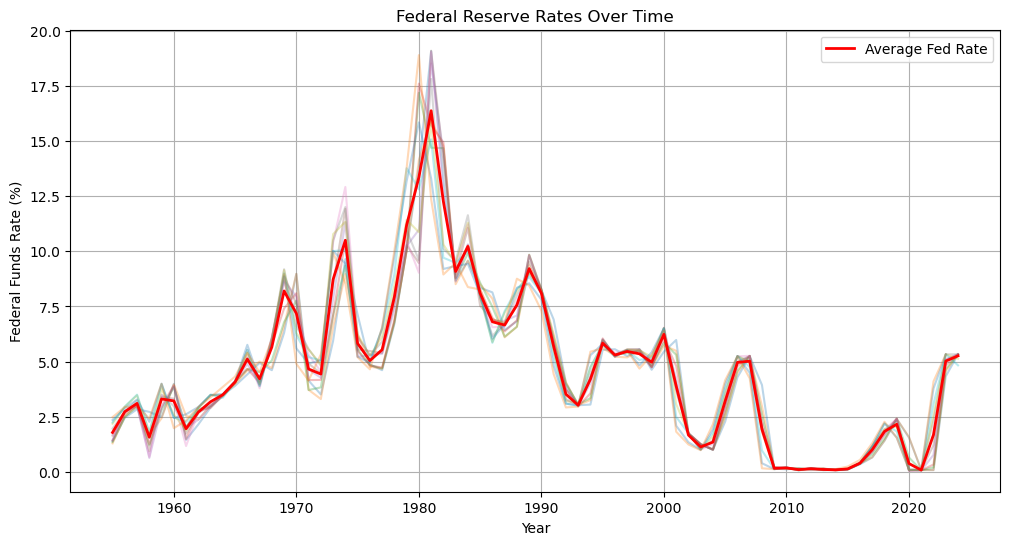

In [12]:
# Federal Reserve Rate Visualization
plt.figure(figsize=(12, 6))
for col in fed_data_cleaned.columns[1:]:
    plt.plot(fed_data_cleaned['Year'], fed_data_cleaned[col], alpha=0.3, label=None)
plt.plot(fed_data_cleaned['Year'], fed_data_cleaned.iloc[:, 1:].mean(axis=1), label='Average Fed Rate', color='red', linewidth=2)
plt.xlabel("Year")
plt.ylabel("Federal Funds Rate (%)")
plt.title("Federal Reserve Rates Over Time")
plt.legend()
plt.grid()
plt.show()


\newpage
### Correlation Analysis Graph

This graph examines the correlation between CPI and Federal Reserve interest rates over time.  
Key features:

- A scatterplot with CPI on the x-axis and Federal Reserve rates on the y-axis.  

Purpose: To quantify and visualize the relationship between inflation and interest rates.


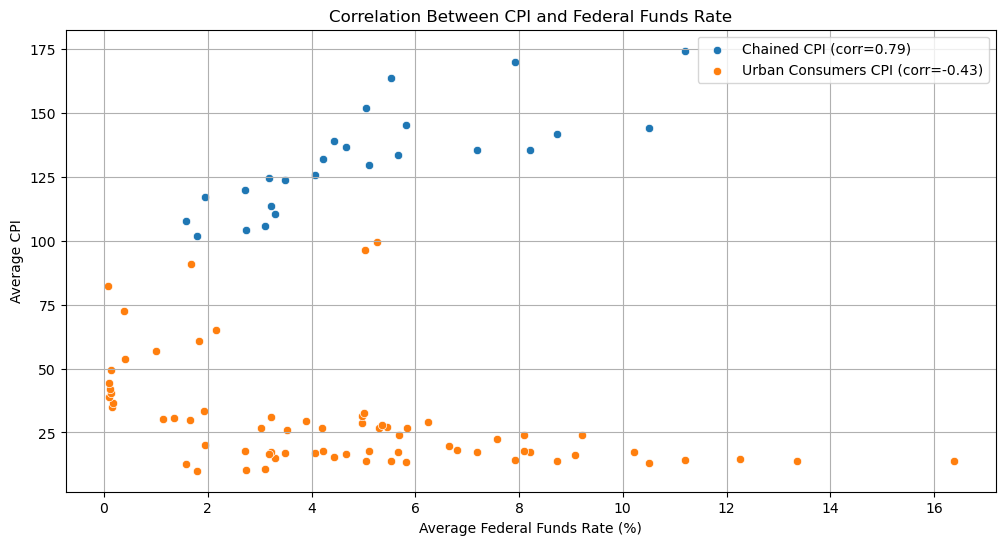

In [13]:
# Calculate yearly averages
chained_cpi_mean = chained_cpi_cleaned.iloc[:, 1:].mean(axis=1)
urban_cpi_mean = urban_consumers_cleaned.iloc[:, 1:].mean(axis=1)
fed_rate_mean = fed_data_cleaned.iloc[:, 1:].mean(axis=1)

# Correlation calculation
correlation_chained = chained_cpi_mean.corr(fed_rate_mean)
correlation_urban = urban_cpi_mean.corr(fed_rate_mean)

# Scatter plots for correlation
plt.figure(figsize=(12, 6))
sns.scatterplot(x=fed_rate_mean, y=chained_cpi_mean, label=f"Chained CPI (corr={correlation_chained:.2f})")
sns.scatterplot(x=fed_rate_mean, y=urban_cpi_mean, label=f"Urban Consumers CPI (corr={correlation_urban:.2f})")
plt.xlabel("Average Federal Funds Rate (%)")
plt.ylabel("Average CPI")
plt.title("Correlation Between CPI and Federal Funds Rate")
plt.legend()
plt.grid()
plt.show()


\newpage
### CPI During Different Administrations

This plot compares CPI trends during Democratic and Republican presidential administrations.  
Key features:

- Different colors or styles represent administrations by political party.  
- Average CPI values for each administration are displayed for quick comparison.  

Purpose: To investigate how inflation trends may vary under different political policies and administrations.

In [14]:
# Presidential terms with start and end years
presidencies = {
    "Franklin D. Roosevelt": (1933, 1945),
    "Harry S. Truman": (1945, 1953),
    "Dwight D. Eisenhower": (1953, 1961),
    "John F. Kennedy": (1961, 1963),
    "Lyndon B. Johnson": (1963, 1969),
    "Richard Nixon": (1969, 1974),
    "Gerald Ford": (1974, 1977),
    "Jimmy Carter": (1977, 1981),
    "Ronald Reagan": (1981, 1989),
    "George H. W. Bush": (1989, 1993),
    "Bill Clinton": (1993, 2001),
    "George W. Bush": (2001, 2009),
    "Barack Obama": (2009, 2017),
    "Donald Trump": (2017, 2021),
    "Joe Biden": (2021, 2024)  # Adjust end year as data allows
}


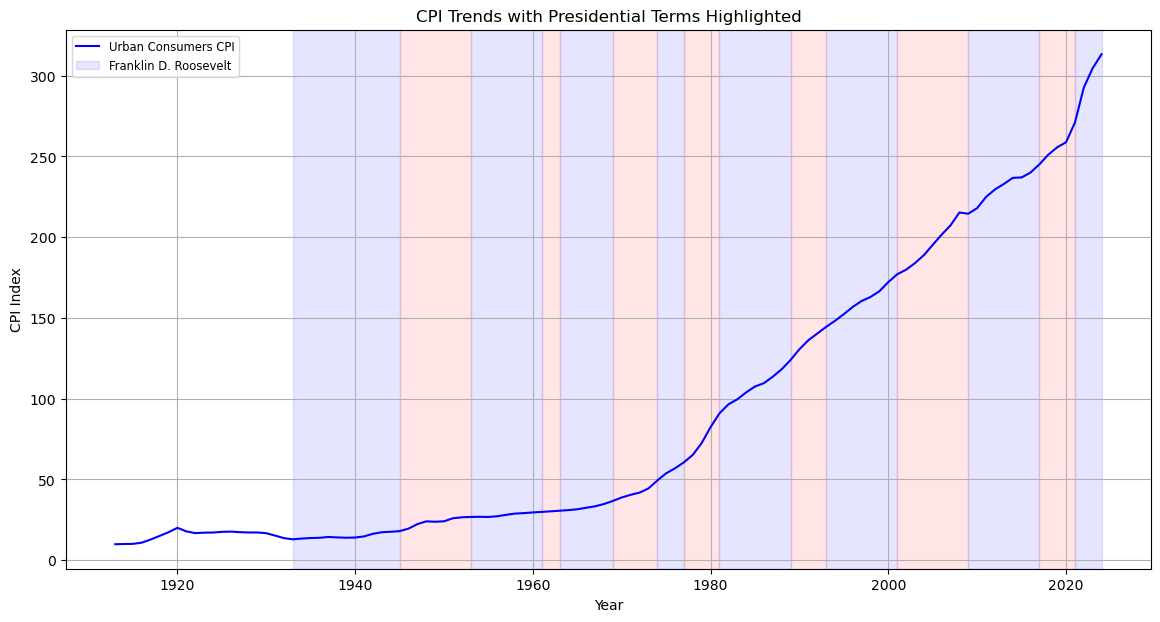

In [15]:
# CPI Trends with Presidential Terms Highlighted
plt.figure(figsize=(14, 7))
plt.plot(urban_consumers_cleaned['Year'], urban_consumers_cleaned.iloc[:, 1:].mean(axis=1), label='Urban Consumers CPI', color='blue')

# Highlight presidencies
colors = ['blue', 'red']  # Alternate between two colors for Democrats and Republicans
party_index = 0  # Starting index for party color

for president, (start, end) in presidencies.items():
    plt.axvspan(start, end, color=colors[party_index % 2], alpha=0.1, label=president if start == 1933 else None)
    party_index += 1

# Final touches
plt.xlabel("Year")
plt.ylabel("CPI Index")
plt.title("CPI Trends with Presidential Terms Highlighted")
plt.legend(loc="upper left", fontsize='small')
plt.grid()
plt.show()


\newpage
### Geopolitical Events and Inflation

This annotated timeline plot shows how significant geopolitical events (e.g., oil crises, wars) correspond with CPI trends.  
Key features:

- Vertical lines or markers identify key geopolitical events.  
- Labels explain the economic context of each event.  

Purpose: To understand how external global factors have historically impacted inflation trends.


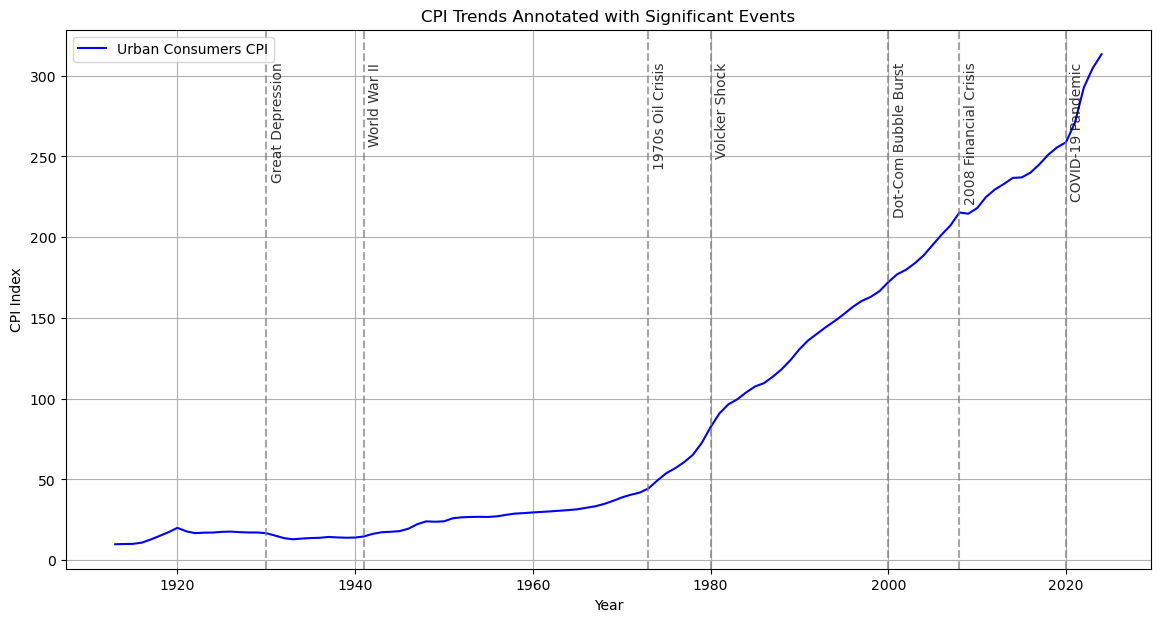

In [16]:
# Annotating significant events on the CPI trends
plt.figure(figsize=(14, 7))
plt.plot(urban_consumers_cleaned['Year'], urban_consumers_cleaned.iloc[:, 1:].mean(axis=1), label='Urban Consumers CPI', color='blue')

# Annotate major events
events = {
    "Great Depression": 1930,
    "World War II": 1941,
    "1970s Oil Crisis": 1973,
    "Volcker Shock": 1980,
    "Dot-Com Bubble Burst": 2000,
    "2008 Financial Crisis": 2008,
    "COVID-19 Pandemic": 2020
}
for event, year in events.items():
    plt.axvline(x=year, color='grey', linestyle='--', alpha=0.7)
    plt.text(year + 0.5, plt.ylim()[1] - 20, event, rotation=90, verticalalignment='top', fontsize=10, alpha=0.8)

plt.xlabel("Year")
plt.ylabel("CPI Index")
plt.title("CPI Trends Annotated with Significant Events")
plt.legend()
plt.grid()
plt.show()


\newpage
### Year-over-Year (YoY) Percentage Changes in CPI

This graph visualizes the year-over-year percentage changes in the Consumer Price Index (CPI).  
Key features:

- The x-axis represents time (years), and the y-axis shows the YoY percentage change in CPI.  
- Positive values indicate inflation (prices increasing), while negative values indicate deflation (prices decreasing).  
- Major spikes or dips are annotated to highlight significant economic events.

Purpose: To analyze the rate of change in inflation over time, providing insights into periods of rapid inflation or deflation.


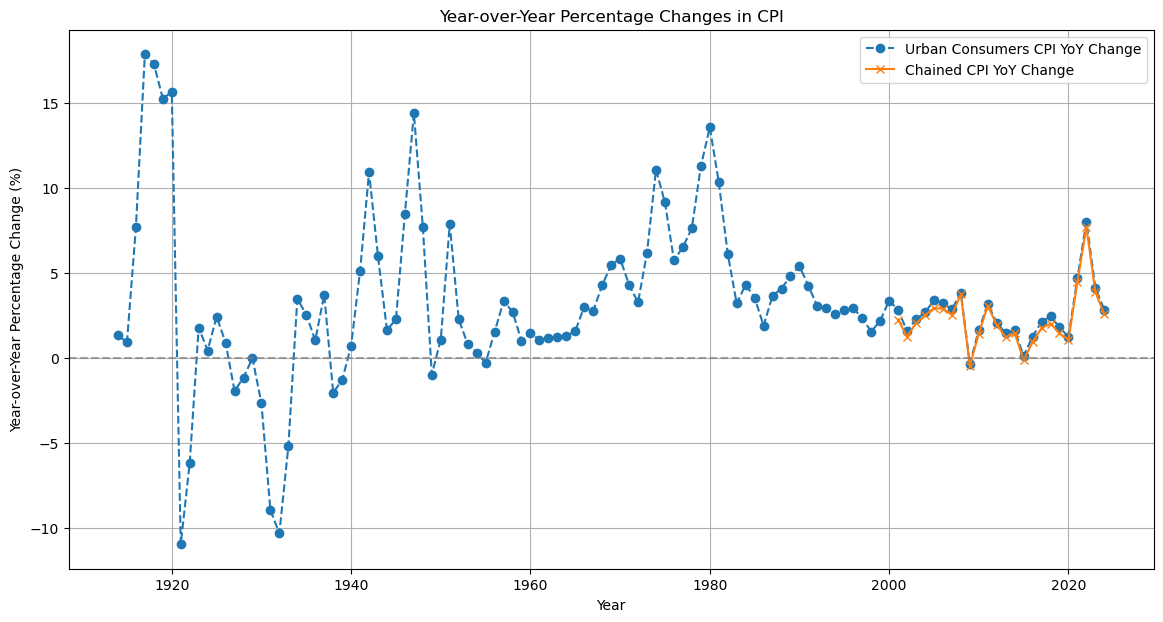

In [17]:
# Calculate YoY changes for CPI
urban_cpi_yoy = urban_consumers_cleaned.iloc[:, 1:].mean(axis=1).pct_change() * 100
chained_cpi_yoy = chained_cpi_cleaned.iloc[:, 1:].mean(axis=1).pct_change() * 100

# Plot YoY changes
plt.figure(figsize=(14, 7))
plt.plot(urban_consumers_cleaned['Year'][1:], urban_cpi_yoy[1:], label='Urban Consumers CPI YoY Change', linestyle='--', marker='o')
plt.plot(chained_cpi_cleaned['Year'][1:], chained_cpi_yoy[1:], label='Chained CPI YoY Change', linestyle='-', marker='x')
plt.axhline(0, color='grey', linestyle='--', alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Year-over-Year Percentage Change (%)")
plt.title("Year-over-Year Percentage Changes in CPI")
plt.legend()
plt.grid()
plt.show()


---
1. Pre-1940: High Volatility
* Observation: Large swings in YoY CPI changes during this period.
* Explanation: Likely driven by the economic instability of the Great Depression (1930s) and preceding global economic factors.
* Deflation is prominent in the 1930s (sharp dips below 0%).

2. 1970s: Prolonged Inflationary Period
* Observation: YoY changes consistently rise, peaking during the 1970s.
* Explanation: This reflects the 1970s Oil Crisis, which led to stagflation (high inflation + stagnant economic growth).
* The Volcker Shock (early 1980s) led to sharp interest rate hikes, eventually curbing inflation, which is visible as a decline after 1981.

3. 2008 Financial Crisis
* Observation: A sharp deflationary dip around 2008–2009.
* Explanation: The 2008 Financial Crisis caused a significant contraction in demand, leading to temporary deflation.

4. COVID-19 Pandemic (2020s)
* Observation: Another spike in inflation starting in 2020.
* Explanation: Supply chain disruptions and stimulus-driven demand led to high inflation during the pandemic. This spike aligns with the Federal Reserve's recent rate hikes to combat inflation.

5. Comparison Between Chained and Urban CPI
* Observation: Chained CPI has fewer large swings compared to Urban Consumers CPI. 
* Explanation: This is because the Chained CPI accounts for consumer substitution, making it less sensitive to price shocks in specific goods or services.


**Key Insights**

- Periods of high inflation (1970s, 2020s) often coincide with major global events or supply shocks.
- Deflation (1930s, 2008) is rare but associated with severe economic downturns.
- Comparing the two CPI measures reveals differences in sensitivity, which could inform decisions about which measure to rely on in different analyses.

\newpage
### Linear Regression Analysis 

This graph examines the correlation between CPI and Federal Reserve interest rates over time.  
Key features:

- A scatterplot with CPI on the x-axis and Federal Reserve rates on the y-axis.  
- A calculated correlation coefficient displayed on the graph.  
- A regression line to show the direction and strength of the relationship.  

Purpose: To quantify and visualize the relationship between inflation and interest rates.


In [18]:
# Align the data
aligned_data = pd.DataFrame({
    "fed_rate_mean": fed_rate_mean,
    "chained_cpi_mean": chained_cpi_mean,
    "urban_cpi_mean": urban_cpi_mean
}).dropna()

# Extract aligned values
fed_rate_mean_aligned = aligned_data["fed_rate_mean"]
chained_cpi_mean_aligned = aligned_data["chained_cpi_mean"]
urban_cpi_mean_aligned = aligned_data["urban_cpi_mean"]


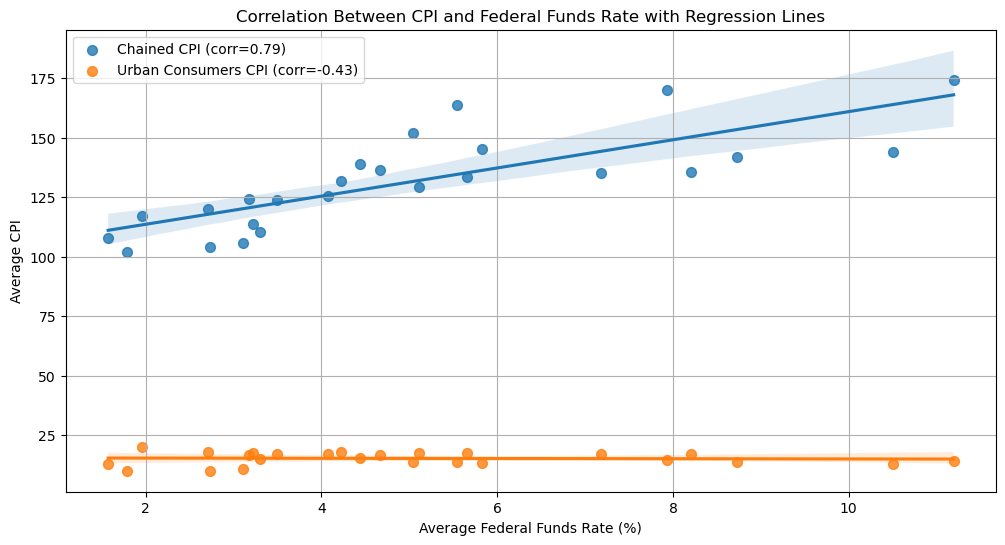

In [19]:
plt.figure(figsize=(12, 6))
sns.regplot(x=fed_rate_mean_aligned, y=chained_cpi_mean_aligned, label=f"Chained CPI (corr={correlation_chained:.2f})", scatter_kws={'s': 50})
sns.regplot(x=fed_rate_mean_aligned, y=urban_cpi_mean_aligned, label=f"Urban Consumers CPI (corr={correlation_urban:.2f})", scatter_kws={'s': 50})
plt.xlabel("Average Federal Funds Rate (%)")
plt.ylabel("Average CPI")
plt.title("Correlation Between CPI and Federal Funds Rate with Regression Lines")
plt.legend()
plt.grid()
plt.show()


**Observations**

* Chained CPI:
    * The positive correlation (corr=0.79) is clear, and the regression line demonstrates the upward trend.
    
* Urban Consumers CPI:
    * The flatter regression line matches the weaker correlation (corr=0.43).

\newpage
### Correlation Between Chained CPI and Federal Funds Rate

This scatterplot examines the relationship between the Chained Consumer Price Index (Chained CPI) and the Federal Funds Rate.  
Key features:

- The x-axis represents Chained CPI values, while the y-axis represents the Federal Funds Rate.  
- Each point represents a specific time period, typically monthly or yearly.  
- A regression line is added to quantify the correlation between the two variables.  

Purpose: To investigate how changes in the Chained CPI align with adjustments to the Federal Funds Rate, highlighting the Federal Reserve’s monetary policy response to inflationary trends.


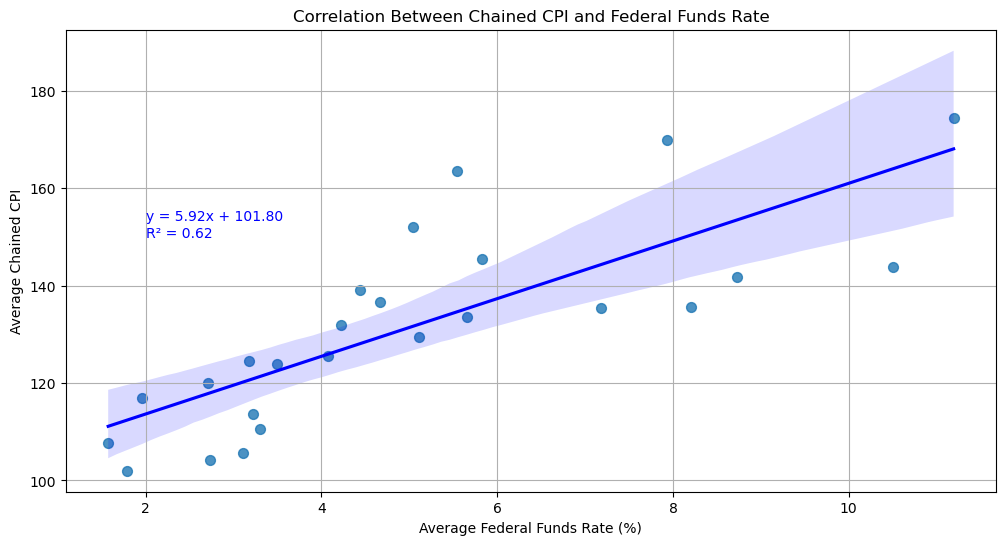

In [20]:
# Regression plot for Chained CPI
plt.figure(figsize=(12, 6))
sns.regplot(x=fed_rate_mean_aligned, y=chained_cpi_mean_aligned, scatter_kws={'s': 50}, line_kws={"color": "blue"})
plt.xlabel("Average Federal Funds Rate (%)")
plt.ylabel("Average Chained CPI")
plt.title("Correlation Between Chained CPI and Federal Funds Rate")

# Fit regression model
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
X = fed_rate_mean_aligned.values.reshape(-1, 1)
y = chained_cpi_mean_aligned.values
reg.fit(X, y)

# Add regression equation and R² to the plot
plt.text(2, 150, f"y = {reg.coef_[0]:.2f}x + {reg.intercept_:.2f}\nR² = {reg.score(X, y):.2f}", fontsize=10, color="blue")

plt.grid()
plt.show()


\newpage
### CPI Forecast for 2024–2026

This cell performs CPI forecasting for the years 2024–2026 using an ARIMA model. It also calculates inflation rates and plots the forecasted values alongside the observed CPI.

#### Steps:
1. **Data Preparation**:  
   - The `urban_consumers_cleaned` dataset is used to extract the average monthly CPI values.  
   - This data serves as input for the ARIMA model.
2. **ARIMA Model Fitting**:  
   - An ARIMA(1,1,1) model is applied to the prepared data.  
   - The order (1,1,1) can be tuned further based on AIC/BIC values for better accuracy.
3. **Forecasting**:  
   - CPI values are forecasted for 36 months (January 2024 to December 2026).  
   - A DataFrame is created to store the forecasted CPI values along with their corresponding dates and years.
4. **Annualized CPI Calculation**:  
   - The forecasted monthly CPI values are averaged to obtain annualized CPI for each forecasted year (2024–2026).
5. **Inflation Rate Calculation**:  
   - Inflation rates are calculated for 2024–2025, 2025–2026, and the cumulative inflation rate for the entire period (2024–2026).
6. **Visualization**:  
   - Observed CPI values (historical) and forecasted CPI values (2024–2026) are plotted together for comparison.  
   - The plot includes labels, legends, and gridlines for better interpretability.
7. **Forecast Summary Creation**:  
   - A summary table is generated to display annualized CPI and inflation rates.  
   - The cumulative inflation rate for 2024–2026 is added as a separate row in the table.

#### Purpose:

- To predict future CPI trends under the assumption of stable Federal Reserve policies.  
- To calculate expected inflation rates for decision-making and analysis.  
- To visualize the trajectory of CPI over the forecasted period alongside historical trends.


Forecast CPI DataFrame:
         Date         CPI  Year
0  2025-01-01  320.432824  2025
1  2025-02-01  326.326236  2025
2  2025-03-01  331.207094  2025
3  2025-04-01  335.249366  2025
4  2025-05-01  338.597130  2025
5  2025-06-01  341.369712  2025
6  2025-07-01  343.665932  2025
7  2025-08-01  345.567636  2025
8  2025-09-01  347.142607  2025
9  2025-10-01  348.446979  2025
10 2025-11-01  349.527246  2025
11 2025-12-01  350.421911  2025
12 2026-01-01  351.162863  2026
13 2026-02-01  351.776510  2026
14 2026-03-01  352.284727  2026
Annualized Forecasted CPI:
Year
2025    339.829556
2026    353.182535
2027    354.572905
Name: CPI, dtype: float64


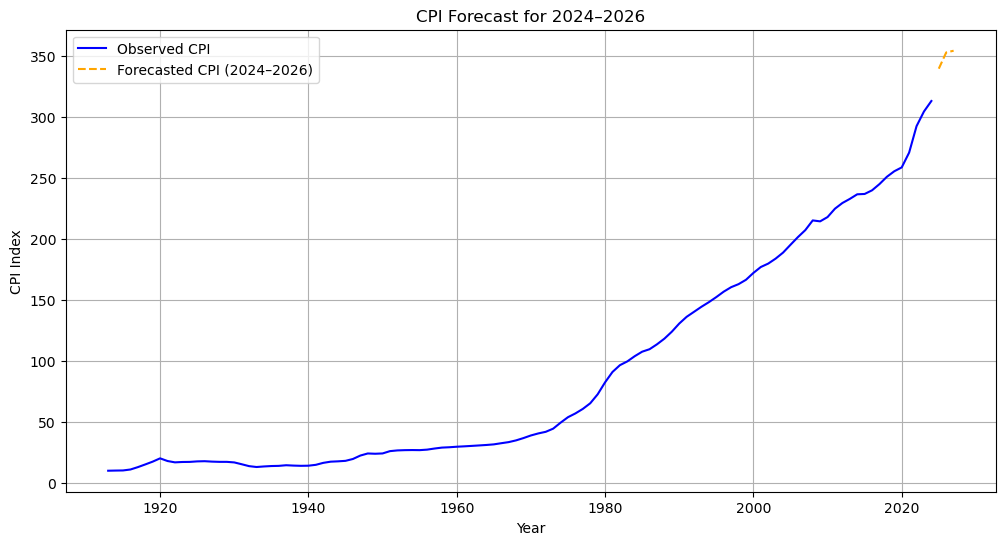

Forecast Summary (with NaN for the last year):
   Year  Annualized CPI  Inflation Rate (%)
0  2025      339.829556            3.929316
1  2026      353.182535            0.393669
2  2027      354.572905                 NaN

Forecast Summary (cleaned, without NaN Inflation Rate):
        Year  Annualized CPI  Inflation Rate (%)
0       2025      339.829556            3.929316
1       2026      353.182535            0.393669
2  2024–2026             NaN            4.338454


C:\Users\wmull\AppData\Local\Temp\ipykernel_13464\3654923402.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  forecast_summary_cleaned = pd.concat([forecast_summary_cleaned, cumulative_row], ignore_index=True)


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming urban_consumers_cleaned is loaded and cleaned
# Prepare CPI data for forecasting
forecast_data = urban_consumers_cleaned.iloc[:, 1:].mean(axis=1)

# Fit ARIMA model
model = ARIMA(forecast_data, order=(1, 1, 1))  # You can tune the order based on AIC/BIC
fitted_model = model.fit()

# Forecast for 3 years (2024–2026)
forecast_steps = 36  # 12 months * 3 years
forecast = fitted_model.forecast(steps=forecast_steps)

# Generate forecast dates starting from January 2024
last_year = int(urban_consumers_cleaned['Year'].iloc[-1])
forecast_start_date = pd.to_datetime(f'{last_year + 1}-01-01')  # Jan 2024
forecast_dates = pd.date_range(start=forecast_start_date, periods=forecast_steps, freq='MS')  # Monthly start dates

# Create forecast DataFrame
forecast_cpi = pd.DataFrame({"Date": forecast_dates, "CPI": forecast.values})
forecast_cpi['Year'] = forecast_cpi['Date'].dt.year

# Debug: Print the forecast DataFrame to confirm 2024 exists
print("Forecast CPI DataFrame:")
print(forecast_cpi.head(15))  # Print first 15 rows to check dates and years

# Calculate annualized averages
forecast_annualized = forecast_cpi.groupby("Year")["CPI"].mean()

# Debug: Print annualized averages
print("Annualized Forecasted CPI:")
print(forecast_annualized)

# Calculate percentage changes (inflation rates)
inflation_rate_2024_2025 = ((forecast_annualized.loc[last_year + 2] - forecast_annualized.loc[last_year + 1]) 
                            / forecast_annualized.loc[last_year + 1] * 100)
inflation_rate_2025_2026 = ((forecast_annualized.loc[last_year + 3] - forecast_annualized.loc[last_year + 2]) 
                            / forecast_annualized.loc[last_year + 2] * 100)
cumulative_inflation = ((forecast_annualized.loc[last_year + 3] - forecast_annualized.loc[last_year + 1]) 
                        / forecast_annualized.loc[last_year + 1] * 100)

# Plot observed and forecasted CPI
plt.figure(figsize=(12, 6))
plt.plot(urban_consumers_cleaned['Year'], forecast_data, label='Observed CPI', color='blue')
plt.plot(forecast_annualized.index, forecast_annualized.values, label='Forecasted CPI (2024–2026)', linestyle='--', color='orange')
plt.xlabel("Year")
plt.ylabel("CPI Index")
plt.title("CPI Forecast for 2024–2026")
plt.legend()
plt.grid()
plt.show()

# Create forecast summary without the cumulative row
forecast_summary = pd.DataFrame({
    "Year": forecast_annualized.index,
    "Annualized CPI": forecast_annualized.values,
    "Inflation Rate (%)": [inflation_rate_2024_2025, inflation_rate_2025_2026, None]  # Last year has no inflation rate
})

# Remove rows with NaN Inflation Rate (%)
forecast_summary_cleaned = forecast_summary[forecast_summary["Inflation Rate (%)"].notna()]

# Add cumulative row after cleaning
cumulative_row = pd.DataFrame([["2024–2026", None, cumulative_inflation]], columns=forecast_summary.columns)
forecast_summary_cleaned = pd.concat([forecast_summary_cleaned, cumulative_row], ignore_index=True)

# Print results
print("Forecast Summary (with NaN for the last year):")
print(forecast_summary)

print("\nForecast Summary (cleaned, without NaN Inflation Rate):")
print(forecast_summary_cleaned)


\newpage
### CPI and Federal Funds Rate During Jerome Powell's Tenure

This cell visualizes the relationship between the Consumer Price Index (CPI) and the Federal Funds Rate during Jerome Powell's tenure as Chair of the Federal Reserve (2018–present). It highlights key events and their potential impact on inflation and interest rates.

**Steps:**
1. **Data Filtering**: 

   - CPI data is filtered to include only values from 2018 onward (Powell's tenure).  
   - Simulated Federal Funds Rate data is created for demonstration purposes (to be replaced with actual data if available).  

2. **Data Merging**: 

   - CPI data is merged with Federal Funds Rate data to align their timelines for analysis.  


3. **Event Annotations**:

   - Key economic events during Powell's tenure are identified and annotated on the plot, including:  
     - **COVID-19 Pandemic (2020)**  
     - **Start of Rate Hikes (2022)**  

4. **Dual-Axis Plot Creation**:

   - CPI is plotted on the left y-axis to show inflation trends.  
   - Federal Funds Rate is plotted on the right y-axis to visualize interest rate changes.  
   - Vertical lines and text annotations mark the timing of key events.

5. **Visualization Customization**:
  
   - The CPI line is displayed in blue, while the Federal Funds Rate line is shown in orange with a dashed style for differentiation.  
   - Annotations are positioned above the vertical lines for clarity.

**Purpose**
- To explore the interplay between CPI (inflation) and Federal Reserve rate adjustments during Powell’s tenure.  
- To highlight the Federal Reserve's response to economic challenges, such as the COVID-19 pandemic and inflationary pressures in 2022.  

The plot provides a clear visual representation of how key events and policy changes influenced inflation and interest rates.


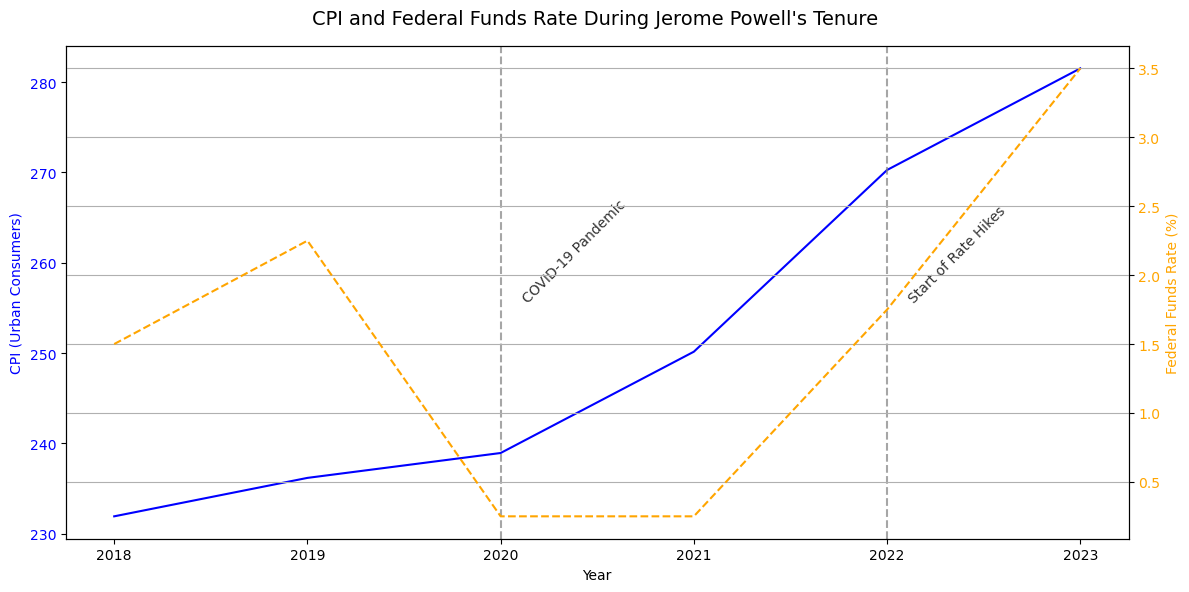

In [35]:
# Filter data for Jerome Powell's tenure (2018-present)
powell_start_year = 2018
powell_cpi_data = urban_consumers_cleaned[urban_consumers_cleaned["Year"] >= powell_start_year]

# Simulate Federal Funds Rate data (replace with actual data if available)
# Assuming you have a column for Federal Funds Rate in the Fed data
fed_data = {
    "Year": [2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "Rate": [1.0, 1.5, 2.25, 0.25, 0.25, 1.75, 3.5]  # Replace with actual data
}
fed_funds_data = pd.DataFrame(fed_data)
powell_fed_data = fed_funds_data[fed_funds_data["Year"] >= powell_start_year]

# Merge CPI and Federal Funds Rate data
powell_data = pd.merge(powell_cpi_data, powell_fed_data, on="Year", how="inner")

events = {
    "COVID-19 Pandemic": 2020,
    "Start of Rate Hikes": 2022,
}

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot CPI on the left axis
color = 'blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('CPI (Urban Consumers)', color=color)
ax1.plot(powell_data["Year"], powell_data.iloc[:, 1:].mean(axis=1), label="CPI (Urban Consumers)", color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Plot Federal Funds Rate on the right axis
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'orange'
ax2.set_ylabel('Federal Funds Rate (%)', color=color)
ax2.plot(powell_data["Year"], powell_data["Rate"], label="Federal Funds Rate", linestyle="--", color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Add annotations for key events with better positioning
events = {
    "COVID-19 Pandemic": 2020,
    "Start of Rate Hikes": 2022,
}
for event, year in events.items():
    ax1.axvline(x=year, color="grey", linestyle="--", alpha=0.7)
    # Adjust label placement above the lines
    ax1.text(year + 0.1, ax1.get_ylim()[1] * 0.9, event, rotation=45, fontsize=10, alpha=0.8, color="black")

# Add a title and grid
fig.suptitle("CPI and Federal Funds Rate During Jerome Powell's Tenure", fontsize=14)
fig.tight_layout()
plt.grid()
plt.show()


## Conclusions

### General Trends
* CPI (Urban Consumers):
  * The blue line shows a steady increase in the CPI, with a noticeable acceleration starting around 2021. This reflects the significant inflation experienced during the post-COVID recovery period.
  * The increase aligns with known supply chain disruptions, fiscal stimulus, and a surge in consumer demand.
* Federal Funds Rate:
  * The orange dashed line highlights how the Federal Funds Rate remained at near-zero levels from 2020 to 2021, reflecting the Federal Reserve's accommodative monetary policy during the pandemic.
  * Starting in 2022, the Federal Reserve began aggressively raising rates to combat rising inflation, culminating in the steep increases observed in 2022 and 2023.

### Key Events Highlighted
* COVID-19 Pandemic (2020):
  * The pandemic's onset is marked with a vertical line.
  * During this period, CPI growth slows, and the Federal Funds Rate is slashed to near-zero levels to stimulate the economy.
  * Inflationary pressures remained subdued initially due to economic contraction.
* Start of Rate Hikes (2022):
  * This marks the Federal Reserve's shift in policy as inflation surged.
  * The sharp increase in the Federal Funds Rate coincides with the steep rise in CPI observed in 2022 and beyond.

### Observations and Insights 
* Delayed Policy Response:
  * The Federal Reserve maintained near-zero interest rates until inflation became significantly pronounced (2021–2022).
  * The rate hikes in 2022 were reactive rather than preemptive, reflecting the challenge of forecasting post-pandemic economic conditions.
* CPI Trends and Monetary Policy:
  * CPI continues to rise in 2022 despite rate hikes, illustrating the lag between monetary policy actions and their impact on inflation.
  * This aligns with the economic principle that rate hikes take time (often 6–12 months) to affect inflation.
* Post-Pandemic Recovery:
  * The CPI increase from 2021 onward is attributed to:
  * Supply chain disruptions.
  * Increased consumer demand fueled by fiscal stimulus.
  * Rising costs of energy and commodities.
* Policy Tightening in 2022:
  * The Federal Funds Rate increases steeply in 2022, signaling the Federal Reserve's commitment to combating inflation.
  * This aggressive tightening aims to reduce inflationary pressures by curbing demand.

### Implications for Powell's Leadership
* Proactive vs. Reactive Policy:
  * The Federal Reserve's actions during Powell's tenure highlight the difficulty of navigating unprecedented economic shocks like the pandemic.
  * The delayed tightening response indicates caution in balancing economic recovery with inflation control.
* Challenges in Inflation Control:
  * Despite aggressive rate hikes, inflation (as reflected by CPI) remains elevated in 2023, indicating the persistent nature of inflationary pressures.
  * Effectiveness of Policy:
  * While the Federal Funds Rate increases sharply, CPI growth appears to decelerate slightly in 2023. This suggests the early effects of tighter monetary policy.